# Summarize info from plots for Manuel

Manuel's paragraph:

In order to corroborate the interpretations of Pb distributions in Baffin Bay, water mass back trajectory simulations (from 2014/01/01 to 2015/08/28) were run to trace the origin of water masses sampled at BB1, BB2 and BB3. This analysis supports our previous remarks, showing how surface waters (< 450 m) circulating in Baffin Bay are mostly derived from the East Greenland Current, while below ~450 m waters entering the bay tend to recirculate in the North Subarctic Atlantic. Additionally, the simulations illustrate the augmented Arctic outflow at BB3 station, where from approximately 190 to 270 m, the current around waters in Baffin Bay travels into Smith Sound, recirculate in the archipelago likely mixing with Arctic waters with lower Pb, and from approximately 320 to 380 m the waters are directly exported from the Arctic Ocean to Baffin Bay through Nares Strait, Figure xx. The mixing with Arctic derived waters at BB3 is restricted to the surface waters at about 450 m, precisely where the high Pb feature is observed, Figures 3a and b and xx. A similar behaviour appears for BB1, although the recirculation of shallow surface waters (< 450 m) in the archipelago are reduced and waters can be directly advected from Labrador Sea. At BB1, the circulation of waters below 450 m in the Iceland Basin and the Irminger and Labrador seas is increased, Figures 3a and b and xx.

Points to show:
- 0-450 m waters mostly from East Greenland Current
- 450 - deep waters from North Subarctic Atlantic
- at BB3: 190-270 m waters in Baffin Bay travel into Smith Sound (Arctic), lowering Pb
- at BB3: from 320-380 m waters directly from Arctic Ocean to Baffin Bay through Nares Strait
- at BB3: mixing from 0-450 m with Arctic derived waters
- at BB1: 0-450 m recirculation reduced and directly from Labrador Sea
- at BB1: 450 m - deep --- circulation of waters is increased

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

from salishsea_tools import (
    nc_tools,
    viz_tools,
)
import datetime
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import datetime
import matplotlib.cm as cm
import matplotlib
from matplotlib import colors
import numpy.ma as ma
from matplotlib.patches import Path, PathPatch
from matplotlib.backends.backend_pdf import PdfPages
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/ocean/brogalla/GEOTRACES/analysis-birgit/cmocean-master/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [ ]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
mask = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mask.nc')
tmask = mask.variables['tmask']
tmask = np.array(tmask[:,:,:])
mlons = mask.variables['nav_lon']
mlats = mask.variables['nav_lat']
mlons = np.array(mlons)
mlats = np.array(mlats)
cond = (tmask > 0.1) 
deptht= np.array(mask.variables['nav_lev'])
Z_masked = np.ma.masked_where(cond, tmask) 

In [3]:
depths = deptht[22+3:22+12]

In [4]:
def load_data(filename):
    BB = nc.Dataset(filename)
    initialz_BB = BB.variables['init_z']
    lon_BB = BB.variables['traj_lon']
    lat_BB = BB.variables['traj_lat']
    depths_BB = BB.variables['traj_depth']
    
    initialz_BB = np.array(initialz_BB)
    lon_BB = np.array(lon_BB)   
    lat_BB = np.array(lat_BB)
    depths_BB = np.array(depths_BB)
    
    #depths_BB3 = np.abs(depth_BB3o)
    return lon_BB[:,3:12], lat_BB[:,3:12], depths_BB[:,3:12], initialz_BB #[:,3:12]

In [5]:
def load_station(folder):
    lon0, lat0, depth0, initialz0 = load_data(folder+'original.nc')
    lon1, lat1, depth1, initialz1 = load_data(folder+'sensitivity1.nc')
    lon2, lat2, depth2, initialz2 = load_data(folder+'sensitivity2.nc')
    lon3, lat3, depth3, initialz3 = load_data(folder+'sensitivity3.nc') 
    lon4, lat4, depth4, initialz4 = load_data(folder+'sensitivity4.nc')
    lon5, lat5, depth5, initialz5 = load_data(folder+'sensitivity5.nc')
    lon6, lat6, depth6, initialz6 = load_data(folder+'sensitivity6.nc')
    lon7, lat7, depth7, initialz7 = load_data(folder+'sensitivity7.nc')
    lon8, lat8, depth8, initialz8 = load_data(folder+'sensitivity8.nc')
    BB_lons = np.stack((lon0, lon1, lon2, lon3, lon4, lon5, lon6, lon7, lon8))
    BB_lats = np.stack((lat0, lat1, lat2, lat3, lat4, lat5, lat6, lat7, lat8))
    BB_depths = np.stack((depth0, depth1, depth2, depth3, depth4, depth5, depth6, depth7, depth8))
#     BB_initialz = np.stack((initialz0, initialz1, initialz2, initialz3, initialz4, initialz5, \
#                             initialz6, initialz7, initialz8))
    return BB_lons, BB_lats, BB_depths

In [7]:
folder1 = '/ocean/brogalla/GEOTRACES/Ariane/final_tracks/trajecs_BB1_2011_2015/'
folder2 = '/ocean/brogalla/GEOTRACES/Ariane/final_tracks/trajecs_BB2_2011_2015/'
folder3 = '/ocean/brogalla/GEOTRACES/Ariane/final_tracks/trajecs_BB3_2011_2015/'
BB1_lons, BB1_lats, BB1_depth = load_station(folder1)
BB2_lons, BB2_lats, BB2_depth = load_station(folder2)
BB3_lons, BB3_lats, BB3_depth = load_station(folder3)

In [8]:
BB3_lons.shape

(9, 1681, 9)

# For classification:

In [9]:
def plot_all(lons,lats, title):
    fig, ax = plt.subplots(9,5, figsize=(18,30))
    for run in range(0,9):
        for j in range(0,5):
            proj1=Basemap(projection='eqdc',lat_0 = 72, lon_0 = -55, resolution='l', \
                          width=2.1e6, height=2.1e6, ax=ax[run,j])
            proj1.drawlsmask(land_color = "#8b7765",resolution = 'l') 
            x_sta,y_sta = proj1(lons[0:1,0,0],lats[0:1,0,0])
            ax[run,j].scatter(x_sta,y_sta, s=100, zorder=3, marker='*', c='k')
            
        for depth in range(0,9): # plot each of the depth levels
            lon = lons[run,:,depth]
            lat = lats[run,:,depth]
            x, y = proj1(lon, lat)
            if depth == 0:
                ax[run,0].scatter(x, y, zorder=2, s=2, label=str(depth))
            elif 0 < depth < 3:
                ax[run,1].scatter(x, y, zorder=2, s=2, label=str(depth))
            elif 2 < depth < 5:
                ax[run,2].scatter(x, y, zorder=2, s=2, label=str(depth))
            elif 4 < depth < 7:
                ax[run,3].scatter(x, y, zorder=2, s=2, label=str(depth))
            else:
                ax[run,4].scatter(x, y, zorder=2, s=2, label=str(depth))
        ax[run,0].legend(fontsize=14)
        ax[run,1].legend(fontsize=14)
        ax[run,2].legend(fontsize=14)
        ax[run,3].legend(fontsize=14)
        ax[run,4].legend(fontsize=14)
    fig.suptitle(title, x=0.515, y=.85, fontsize=16)
#     fig.savefig(filename, bbox_inches='tight')
    return fig

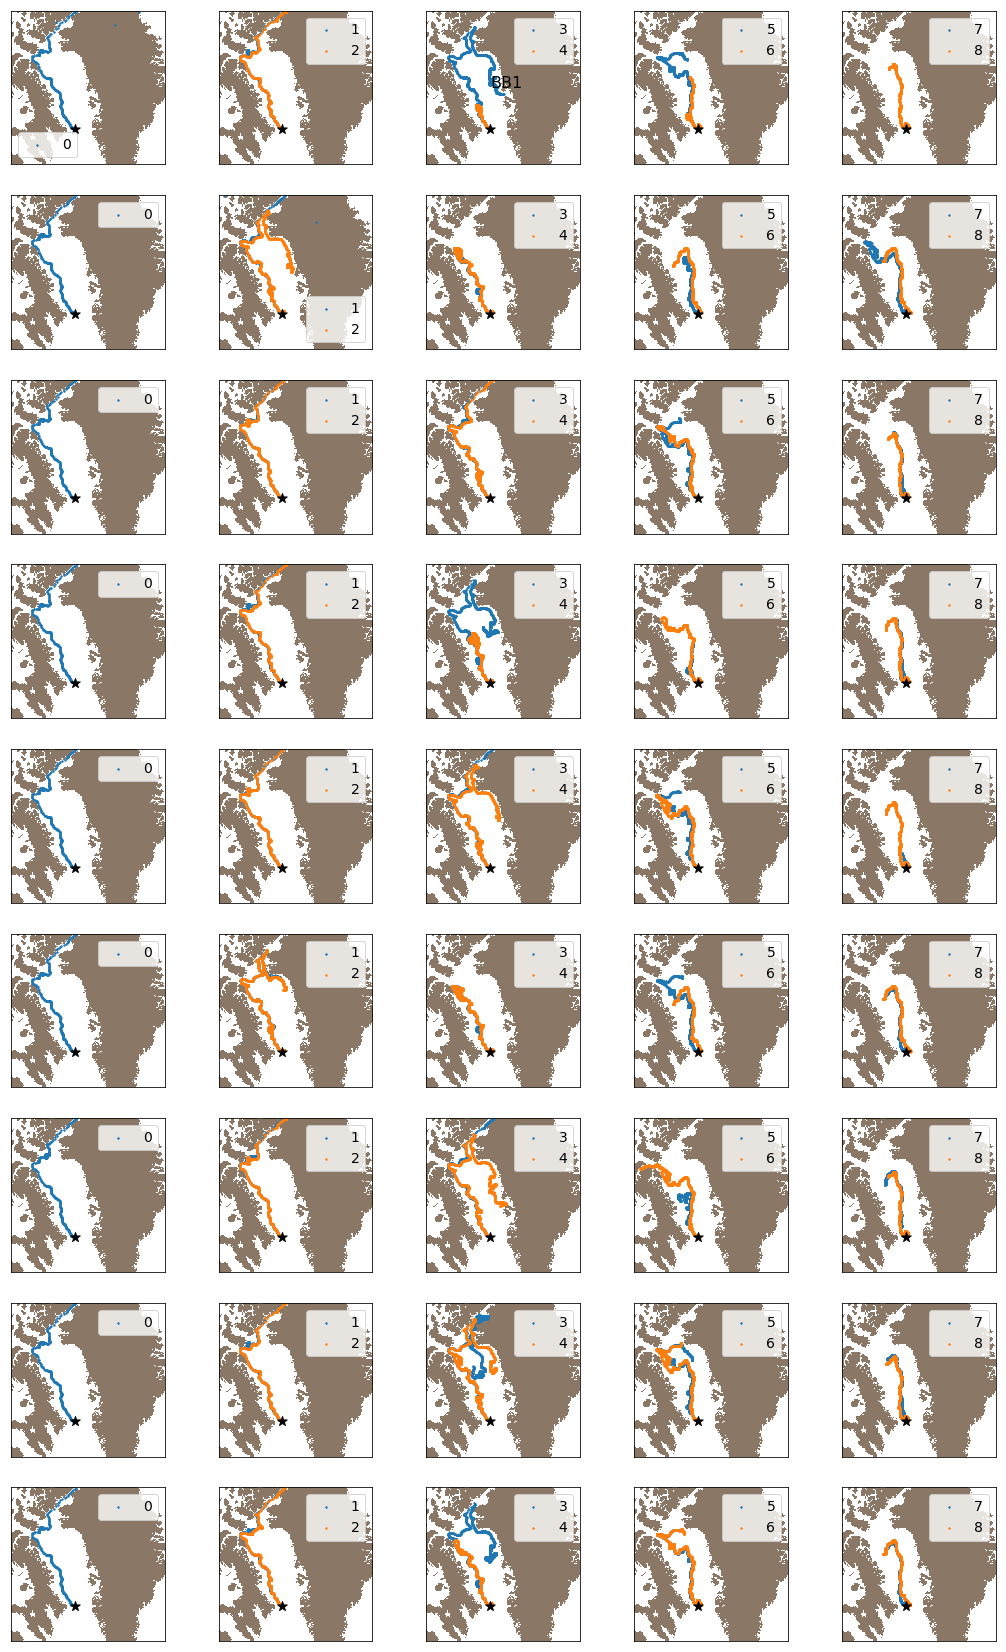

In [10]:
fig1 = plot_all(BB1_lons, BB1_lats, 'BB1')

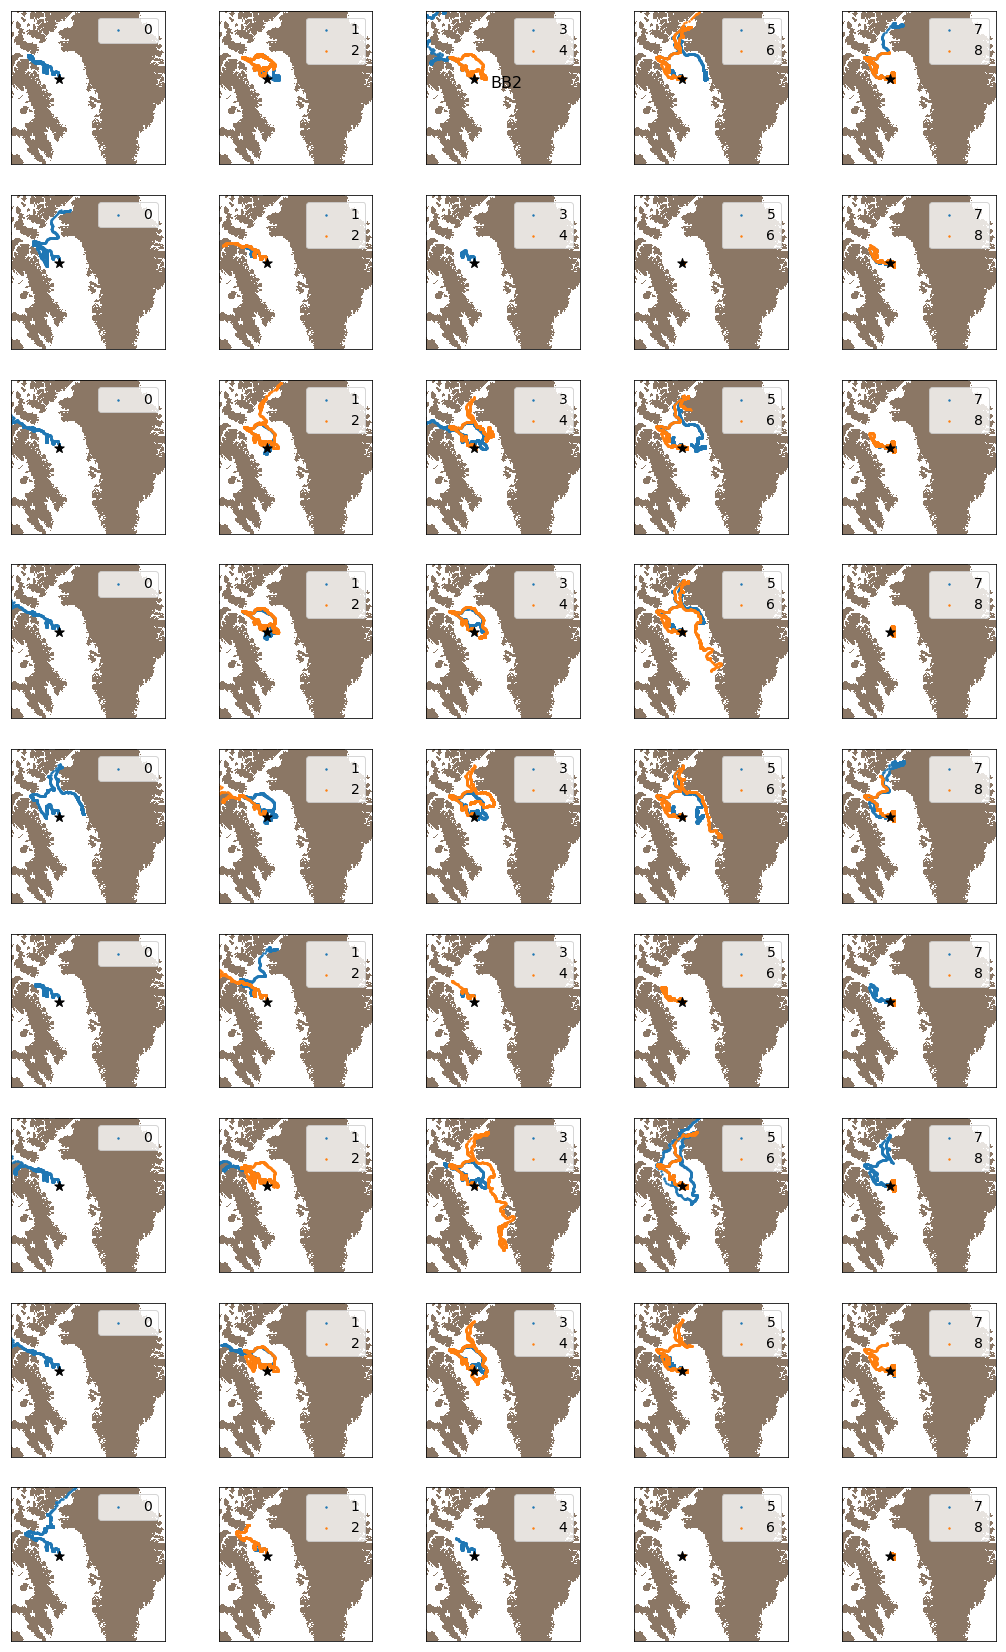

In [11]:
fig2 = plot_all(BB2_lons, BB2_lats, 'BB2')

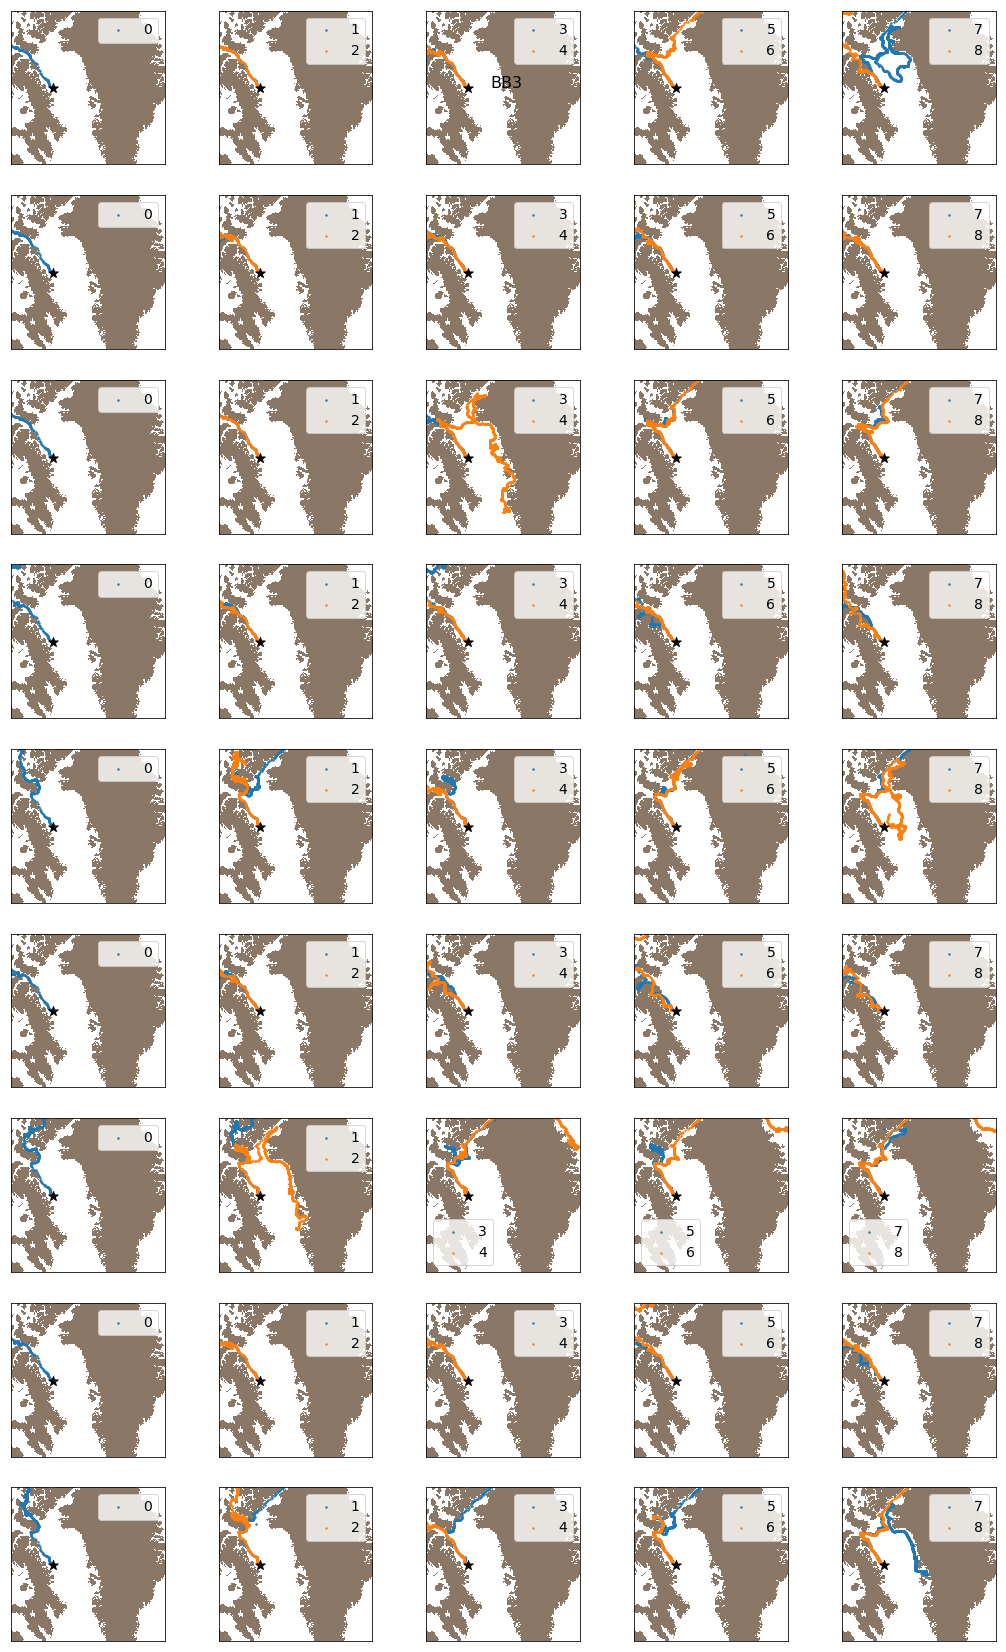

In [12]:
fig3 = plot_all(BB3_lons, BB3_lats, 'BB3')

In [13]:
pp = PdfPages('trajec_20110105-20150808_final.pdf')
pp.savefig(fig1)
pp.savefig(fig2)
pp.savefig(fig3)
pp.close()

### Show that 0-450 m waters mostly originate from the East Greenland Current at all stations:

Mostly true, however there are a couple of weird tracks in BB3 that go through Nares Strait.

In [14]:
def plots_by_depth(proj, ax, lons, lats, time_max, depth, stn, depths=depths):
    # plot all the positions at the same depth:
    for i in range(0,9):
        lon = lons[i,:,:]
        lat = lats[i,:,:]
        x, y = proj(lon[0:time_max, depth], lat[0:time_max, depth])
        ax.scatter(x, y, zorder=2, s=2, color='#606060')
    
    x_sta,y_sta = proj(lons[0:1,0,0],lats[0:1,0,0])
    ax.scatter(x_sta,y_sta, s=100, zorder=3, marker='*', c='r')
    ax.set_title('Depth: ' + str(depths[depth])[:3]+' m, '+stn)
    return

In [15]:
def combine_plots_by_depth(proj1, ax, depth,\
                  BB1_lons=BB1_lons, BB2_lons=BB2_lons, BB3_lons=BB3_lons,\
                  BB1_lats=BB1_lats, BB2_lats=BB2_lats, BB3_lats=BB3_lats):
    ax1 = ax[0]
    ax2 = ax[1]
    ax3 = ax[2]
    
    plots_by_depth(proj1, ax1, BB1_lons, BB1_lats, 4000, depth, 'BB1')
    plots_by_depth(proj1, ax2, BB2_lons, BB2_lats, 4000, depth, 'BB2')
    plots_by_depth(proj1, ax3, BB3_lons, BB3_lats, 4000, depth, 'BB3')
    #else:
    #    plots_by_depth(proj1, ax2, BB2_lons, BB2_lats, 1800, depth, 'BB2')
    #    plots_by_depth(proj1, ax3, BB3_lons, BB3_lats, 1800, depth, 'BB3')
    return

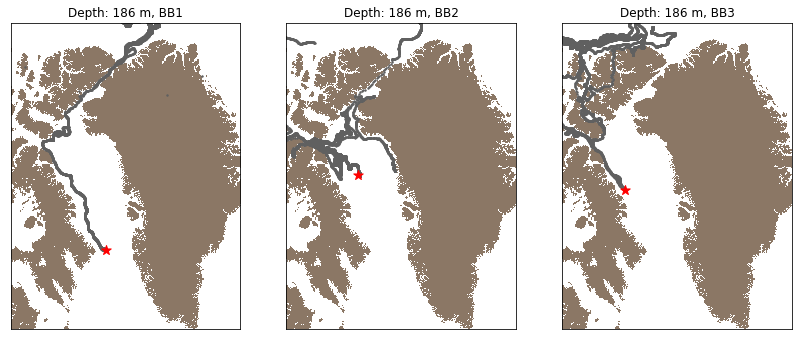

In [16]:
fig, ax = plt.subplots(1,3, figsize=(14,7))

proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', \
                      width=2.1e6, height=2.8e6, ax=ax[0])
proj1.drawlsmask(land_color = "#8b7765",resolution = 'h')
proj2=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', \
                      width=2.1e6, height=2.8e6, ax=ax[1])
proj2.drawlsmask(land_color = "#8b7765",resolution = 'h')
proj3=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', \
                      width=2.1e6, height=2.8e6, ax=ax[2])
proj3.drawlsmask(land_color = "#8b7765",resolution = 'h')

combine_plots_by_depth(proj1, ax, 0)

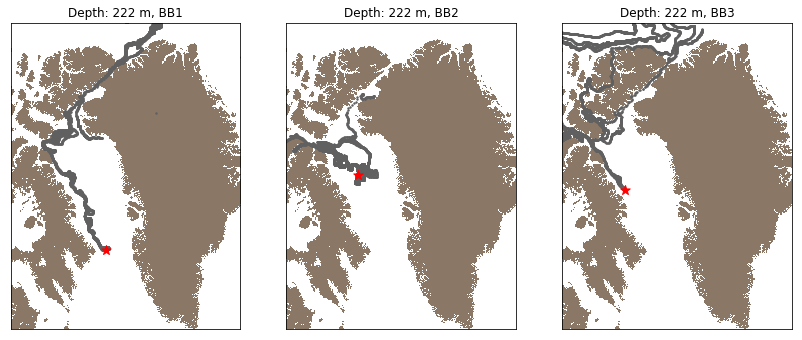

In [17]:
fig, ax = plt.subplots(1,3, figsize=(14,7))

proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', \
                      width=2.1e6, height=2.8e6, ax=ax[0])
proj1.drawlsmask(land_color = "#8b7765",resolution = 'h')
proj2=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', \
                      width=2.1e6, height=2.8e6, ax=ax[1])
proj2.drawlsmask(land_color = "#8b7765",resolution = 'h')
proj3=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', \
                      width=2.1e6, height=2.8e6, ax=ax[2])
proj3.drawlsmask(land_color = "#8b7765",resolution = 'h')

combine_plots_by_depth(proj1, ax, 1)

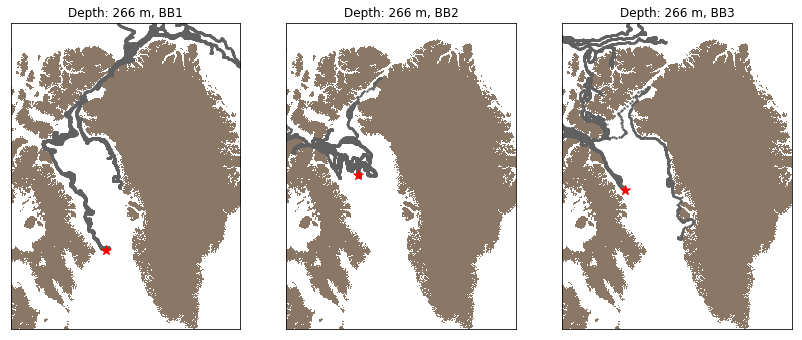

In [18]:
fig, ax = plt.subplots(1,3, figsize=(14,7))

proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', \
                      width=2.1e6, height=2.8e6, ax=ax[0])
proj1.drawlsmask(land_color = "#8b7765",resolution = 'h')
proj2=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', \
                      width=2.1e6, height=2.8e6, ax=ax[1])
proj2.drawlsmask(land_color = "#8b7765",resolution = 'h')
proj3=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', \
                      width=2.1e6, height=2.8e6, ax=ax[2])
proj3.drawlsmask(land_color = "#8b7765",resolution = 'h')

combine_plots_by_depth(proj1, ax, 2)

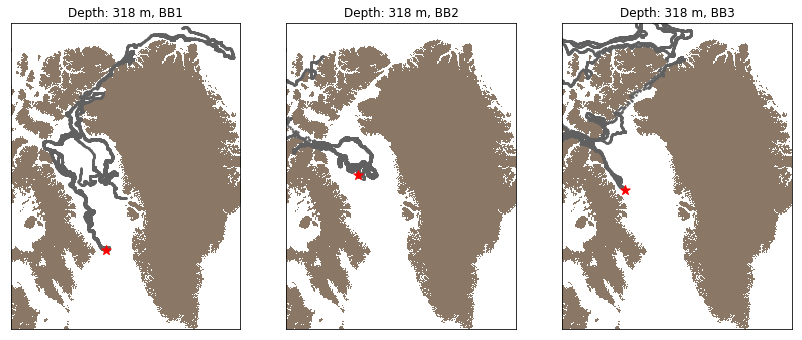

In [19]:
fig, ax = plt.subplots(1,3, figsize=(14,7))

proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', \
                      width=2.1e6, height=2.8e6, ax=ax[0])
proj1.drawlsmask(land_color = "#8b7765",resolution = 'h')
proj2=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', \
                      width=2.1e6, height=2.8e6, ax=ax[1])
proj2.drawlsmask(land_color = "#8b7765",resolution = 'h')
proj3=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', \
                      width=2.1e6, height=2.8e6, ax=ax[2])
proj3.drawlsmask(land_color = "#8b7765",resolution = 'h')

combine_plots_by_depth(proj1, ax, 3)

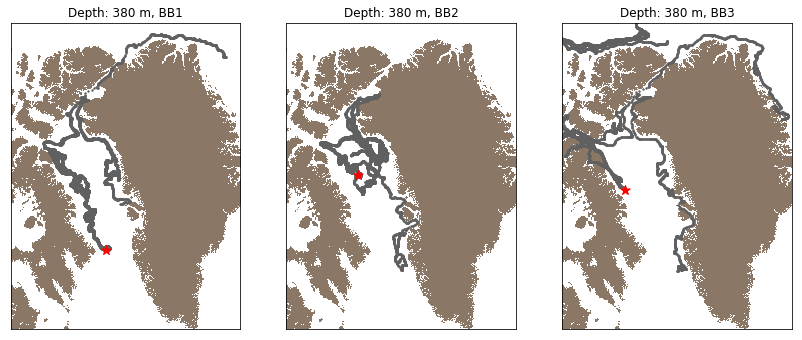

In [20]:
fig, ax = plt.subplots(1,3, figsize=(14,7))

proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', \
                      width=2.1e6, height=2.8e6, ax=ax[0])
proj1.drawlsmask(land_color = "#8b7765",resolution = 'h')
proj2=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', \
                      width=2.1e6, height=2.8e6, ax=ax[1])
proj2.drawlsmask(land_color = "#8b7765",resolution = 'h')
proj3=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', \
                      width=2.1e6, height=2.8e6, ax=ax[2])
proj3.drawlsmask(land_color = "#8b7765",resolution = 'h')

combine_plots_by_depth(proj1, ax, 4)

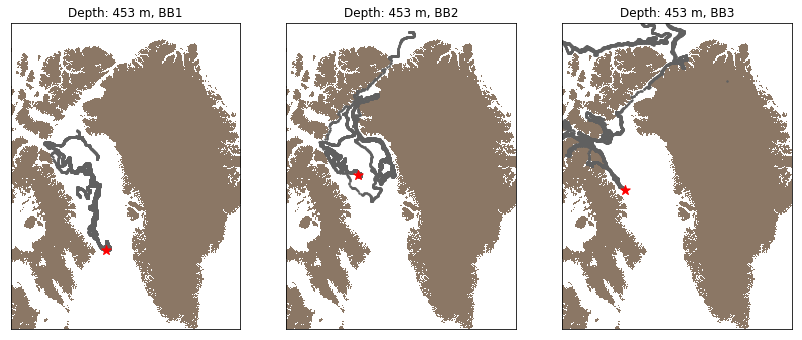

In [21]:
fig, ax = plt.subplots(1,3, figsize=(14,7))

proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', \
                      width=2.1e6, height=2.8e6, ax=ax[0])
proj1.drawlsmask(land_color = "#8b7765",resolution = 'h')
proj2=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', \
                      width=2.1e6, height=2.8e6, ax=ax[1])
proj2.drawlsmask(land_color = "#8b7765",resolution = 'h')
proj3=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', \
                      width=2.1e6, height=2.8e6, ax=ax[2])
proj3.drawlsmask(land_color = "#8b7765",resolution = 'h')

combine_plots_by_depth(proj1, ax, 5)

### Show that the waters deeper than 450 m come from the North Subarctic Atlantic

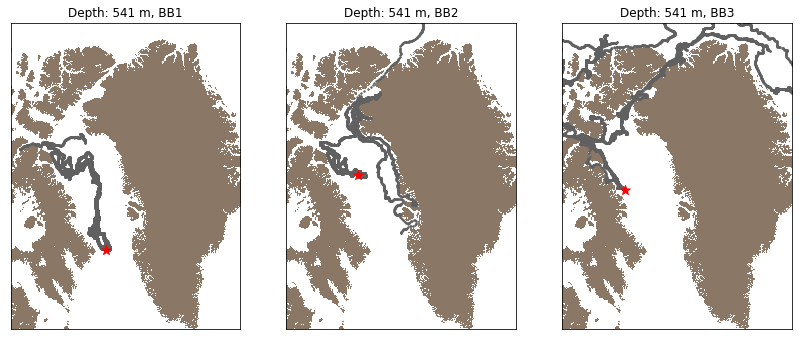

In [22]:
fig, ax = plt.subplots(1,3, figsize=(14,7))

proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', \
                      width=2.1e6, height=2.8e6, ax=ax[0])
proj1.drawlsmask(land_color = "#8b7765",resolution = 'h')
proj2=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', \
                      width=2.1e6, height=2.8e6, ax=ax[1])
proj2.drawlsmask(land_color = "#8b7765",resolution = 'h')
proj3=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', \
                      width=2.1e6, height=2.8e6, ax=ax[2])
proj3.drawlsmask(land_color = "#8b7765",resolution = 'h')

combine_plots_by_depth(proj1, ax, 6)

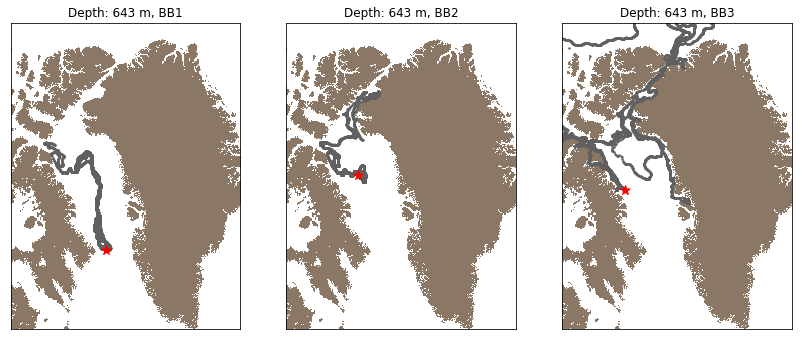

In [23]:
fig, ax = plt.subplots(1,3, figsize=(14,7))

proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', \
                      width=2.1e6, height=2.8e6, ax=ax[0])
proj1.drawlsmask(land_color = "#8b7765",resolution = 'h')
proj2=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', \
                      width=2.1e6, height=2.8e6, ax=ax[1])
proj2.drawlsmask(land_color = "#8b7765",resolution = 'h')
proj3=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', \
                      width=2.1e6, height=2.8e6, ax=ax[2])
proj3.drawlsmask(land_color = "#8b7765",resolution = 'h')

combine_plots_by_depth(proj1, ax, 7)

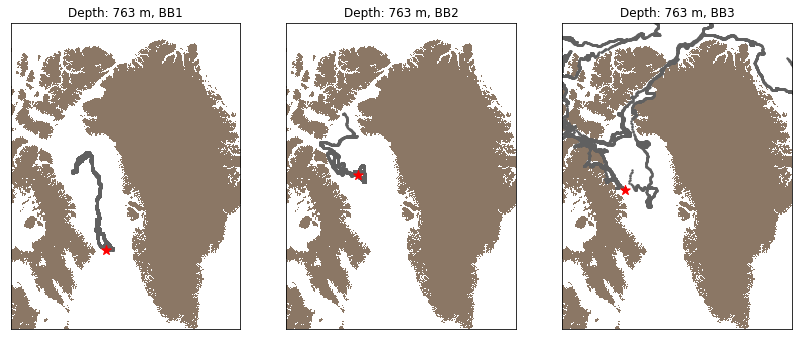

In [24]:
fig, ax = plt.subplots(1,3, figsize=(14,7))

proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', \
                      width=2.1e6, height=2.8e6, ax=ax[0])
proj1.drawlsmask(land_color = "#8b7765",resolution = 'h')
proj2=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', \
                      width=2.1e6, height=2.8e6, ax=ax[1])
proj2.drawlsmask(land_color = "#8b7765",resolution = 'h')
proj3=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='i', \
                      width=2.1e6, height=2.8e6, ax=ax[2])
proj3.drawlsmask(land_color = "#8b7765",resolution = 'h')

combine_plots_by_depth(proj1, ax, 8)

In [ ]:
depths

Group by tracks

## At station BB3 specifically:

- mixing from 0-450 m with Arctic derived waters
- 190-270 m waters in Baffin Bay travel into Smith Sound (Arctic), lowering Pb
- 320-380 m waters directly from Arctic Ocean to Baffin Bay through Nares Strait

In [ ]:
# classify runs BB3:
# 1 - Arctic origin
# 2 - Enters Jones Sound
# 3 - Atlantic water via WGC
# 4 - deep Baffin Bay water
# 5 - Out of z-domain

# depth levels
BB3_0 = [] 
BB3_1 = [] 
BB3_2 = []
BB3_3 = [] 
BB3_4 = []
BB3_5 = []
BB3_6 = [] 
BB3_7 = []
BB3_8 = []
BB3_class = np.stack((BB3_0, BB3_1, BB3_2, BB3_3, BB3_4, BB3_5, BB3_6, BB3_7, BB3_8))

In [ ]:
b = 0
classi = 4
for j in range(0, 3):
    a = sum([i == classi for i in BB3_class[j,:]])
    b += a
print(b)
b = 0
for j in range(3, 6):
    a = sum([i == classi for i in BB3_class[j,:]])
    b += a
print(b)
b = 0
for j in range(6, 9):
    a = sum([i == classi for i in BB3_class[j,:]])
    b += a
print(b)

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(16,10))

time_max=1500
colors = ['#00e5ee', '#ff3a55', '#c1fe29', '#5cabb0'] #Arctic, Jones Sound, WGC Atlantic, deep BB
zorders = [3, 1, 2, 2]

proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='h', \
                      width=2.4e6, height=2.8e6, ax=ax[0])
proj1.drawlsmask(land_color = "#8b7765",resolution = 'h')
proj2=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='l', \
                      width=2.4e6, height=2.8e6, ax=ax[1])
proj2.drawlsmask(land_color = "#8b7765",resolution = 'h')
proj3=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='h', \
                      width=2.4e6, height=2.8e6, ax=ax[2])
proj3.drawlsmask(land_color = "#8b7765",resolution = 'h')

for i in range(0,9): #depths
    for j in range(0,9): #sensitivity runs
        lon = BB3_lons[j,:,i]
        lat = BB3_lats[j,:,i]
        x, y = proj1(lon[0:time_max], lat[0:time_max])
        index_class = BB3_class[i,j]
        if i < 3:
            ax[0].scatter(x, y, zorder=zorders[index_class-1], s=0.8, color=colors[index_class-1]) 
        elif i > 5:
            ax[2].scatter(x, y, zorder=zorders[index_class-1], s=0.8, color=colors[index_class-1]) 
        else:
            ax[1].scatter(x, y, zorder=zorders[index_class-1], s=0.8, color=colors[index_class-1])
    
x_sta,y_sta = proj1(BB3_lons[0:1,0,0],BB3_lats[0:1,0,0])
ax[0].scatter(x_sta,y_sta, s=350, zorder=3, marker='*', c='k', edgecolors='white')
ax[0].set_title('Depth range: 190-270 m', fontsize=14)
ax[1].scatter(x_sta,y_sta, s=350, zorder=3, marker='*', c='k', edgecolors='white')
ax[1].set_title('Depth range: 320-450 m', fontsize=14)
ax[2].scatter(x_sta,y_sta, s=350, zorder=3, marker='*', c='k', edgecolors='white')
ax[2].set_title('Depth range: 540-760 m', fontsize=14)

c1 = ax[2].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[0], edgecolors='none')
c2 = ax[2].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[2], edgecolors='none')
c3 = ax[2].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[3], edgecolors='none')
c4 = ax[2].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[1], edgecolors='none')

ax[0].legend((c1, c4), ('4   --- Arctic', '23 --- WGC enters Smith Sound'), \
             loc = (0.05, -0.20), markerscale=10, fontsize=12)
ax[1].legend((c1, c2, c4), ('4    --- Arctic', '6    --- WGC', \
                            '17  --- WGC enters Smith Sound'), \
             loc = (0.05, -0.25), markerscale=10, fontsize=12)
ax[2].legend((c1, c2, c4, c3), ('3    --- Arctic', '8    --- WGC', \
                                '10  --- WGC enters Smith Sound', '6    --- Deep Baffin Bay'), \
             loc = (0.05, -0.30), markerscale=10, fontsize=12)

fig.savefig('/ocean/brogalla/GEOTRACES/BB3_manuel_2012-2015.png',bbox_inches='tight')

## At station BB1 specifically:

- 0-450 m recirculation reduced and directly from Labrador Sea
- 450 m - deep --- circulation of waters is increased

In [ ]:
# classify runs BB1:
# 1 - Arctic origin
# 2 - Enters Jones Sound
# 3 - Atlantic water via WGC
# 4 - deep Baffin Bay water
# 5 - directly from Atlantic

# depth levels
BB1_0 = [] 
BB1_1 = [] 
BB1_2 = []
BB1_3 = [] 
BB1_4 = []
BB1_5 = [] 
BB1_6 = [] 
BB1_7 = [] 
BB1_8 = [] 
BB1_class = np.stack((BB1_0, BB1_1, BB1_2, BB1_3, BB1_4, BB1_5, BB1_6, BB1_7, BB1_8))

In [ ]:
b = 0
for j in range(0, 5):
    a = sum([i == 1 for i in BB1_class[j,:]])
    b += a
print(b)

In [ ]:
b = 0
for j in range(5, 9):
    a = sum([i == 1 for i in BB1_class[j,:]])
    b += a
print(b)

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,7))

time_max=4500
colors = ['#00e5ee', '#ff3a55', '#c1fe29', '#5cabb0', '#0b53bf'] #Arctic, Jones Sound, WGC, deep BB, Atlantic
zorders = [4, 1, 2, 2, 3]

proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='h', \
                      width=2.4e6, height=2.8e6, ax=ax[0])
proj1.drawlsmask(land_color = "#8b7765",resolution = 'h')
proj2=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='h', \
                      width=2.4e6, height=2.8e6, ax=ax[1])
proj2.drawlsmask(land_color = "#8b7765",resolution = 'h')

for i in range(0,9): #depths
    for j in range(0,9): #sensitivity runs
        lon = BB1_lons[j,:,i]
        lat = BB1_lats[j,:,i]
        x, y = proj1(lon[0:time_max], lat[0:time_max])
        index_class = BB1_class[i,j]
        if i < 5:
            ax[0].scatter(x, y, zorder=zorders[index_class-1], s=0.8, color=colors[index_class-1]) 
        else:
            ax[1].scatter(x, y, zorder=zorders[index_class-1], s=0.8, color=colors[index_class-1])
    
x_sta,y_sta = proj1(BB1_lons[0:1,0,0], BB1_lats[0:1,0,0])
ax[0].scatter(x_sta,y_sta, s=350, zorder=4, marker='*', c='k', edgecolors='white')
ax[0].set_title('Depth range: 190-380 m', fontsize=14)
ax[1].scatter(x_sta,y_sta, s=350, zorder=4, marker='*', c='k', edgecolors='white')
ax[1].set_title('Depth range: 450-760 m', fontsize=14)
            
c1 = ax[1].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[0], edgecolors='none')
c2 = ax[1].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[2], edgecolors='none')
c3 = ax[1].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[3], edgecolors='none') # deep baffin bay
c4 = ax[1].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[1], edgecolors='none')
c5 = ax[1].scatter(x[0], y[0], zorder=1, s=0.8, color=colors[4], edgecolors='none')

ax[0].legend((c1, c2, c4, c3, c5), ('1    --- Arctic','2    --- WGC', \
                                '34  --- WGC enters Smith Sound', '2    --- Deep Baffin Bay', \
                                '6    --- Directly from Atlantic'), \
             loc = (0.05, -0.4), markerscale=10, fontsize=12)
ax[1].legend((c2, c4, c3, c5), ('16    --- WGC', \
                                '1      --- WGC enters Smith Sound', '15    --- Deep Baffin Bay', \
                                '4      --- Directly from Atlantic'), \
             loc = (0.05, -0.3), markerscale=10, fontsize=12)

fig.savefig('/ocean/brogalla/GEOTRACES/BB1_manuel_2012-2015.png',bbox_inches='tight')

## Bar plots

In [ ]:
def sum_class_BB3(classi):
    b1 = 0
    b2 = 0
    b3 = 0
    for j in range(0, 3):
        a1 = sum([i == classi for i in BB3_class[j,:]])
        b1 += a1
        a2 = sum([i == classi for i in BB3_class[j+3,:]])
        b2 += a2
        a3 = sum([i == classi for i in BB3_class[j+6,:]])
        b3 += a3
    b4 = b1+b2+b3
    return b1, b2, b3, b4

In [ ]:
def sum_class_BB1(classi):
    b1 = 0
    b2 = 0
    for j in range(0, 5):
        a1 = sum([i == classi for i in BB1_class[j,:]])
        b1 += a1
    for j in range(5, 9):
        a2 = sum([i == classi for i in BB1_class[j,:]])
        b2 += a2
    b3 = b1+b2
    return b1, b2, b3

In [ ]:
sum_class_BB1(5)[0]

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
N = 5
Arctic_values   = (sum_class_BB1(1)[0]/45, sum_class_BB1(1)[1]/36,\
                   sum_class_BB3(1)[0]/27, sum_class_BB3(1)[1]/27, sum_class_BB3(1)[2]/27)
Jones_values    = (sum_class_BB1(2)[0]/45, sum_class_BB1(2)[1]/36,\
                   sum_class_BB3(2)[0]/27, sum_class_BB3(2)[1]/27, sum_class_BB3(2)[2]/27)
WGC_values      = (sum_class_BB1(3)[0]/45, sum_class_BB1(3)[1]/36,\
                   sum_class_BB3(3)[0]/27, sum_class_BB3(3)[1]/27, sum_class_BB3(3)[2]/27)
BB_values       = (sum_class_BB1(4)[0]/45, sum_class_BB1(4)[1]/36,\
                   sum_class_BB3(4)[0]/27, sum_class_BB3(4)[1]/27, sum_class_BB3(4)[2]/27)
Atlantic_values = (sum_class_BB1(5)[0]/45, sum_class_BB1(5)[1]/36,\
                   sum_class_BB3(5)[0]/27, sum_class_BB3(5)[1]/27, sum_class_BB3(5)[2]/27)
ind = np.arange(N) 
width = 0.45

Arctic = Arctic_values
Jones = Jones_values 
WGC = WGC_values 
BB = BB_values 
Atlantic = Atlantic_values

p1 = plt.bar(ind, Arctic   , width, color='#00e5ee')
p2 = plt.bar(ind, Jones    , width, bottom=Arctic, color='#ff3a55')
p3 = plt.bar(ind, WGC      , width, bottom=np.add(Jones, Arctic), color='#c1fe29')
p4 = plt.bar(ind, BB       , width, bottom=np.add(np.add(WGC, Jones),Arctic), color='#5cabb0')
p5 = plt.bar(ind, Atlantic , width, bottom=np.add(np.add(np.add(WGC, Jones),Arctic), BB), color='#0b53bf')

plt.ylabel('Proportion', fontsize=12)
plt.xticks(ind, ('BB1, 190-380 m', 'BB1, 450-760 m', 'BB3, 190-270 m', 'BB3, 320-450 m', 'BB3, 540-760 m'),\
           fontsize=12)
# plt.yticks(np.arange(0, 101, 10))
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('Arctic','Smith Sound','WGC','Baffin Bay interior', \
                                                 'Atlantic'), framealpha=0, fontsize=12, loc=(1,0))
fig.savefig('/ocean/brogalla/GEOTRACES/props_manuel_2012-2015.png',bbox_inches='tight')

In [ ]:
np.add(Jones, Arctic)

In [ ]:
print(Jones)
print(Arctic)